# Unüberwachtes Lernen mit Twitter

Semesterarbeit 4

## EDS-Einführung in Data Science

Klasse: BSc INF-P-IN010, BE1, HS20/21<br>
Dozent: Dr. Tim vor der Brück<br>
Autor:  Michael Friderich<br>
Datum:  08.01.2021<br>

## Einleitung

Viel häufiger als beim überwachten Lernen, treffen wir auf das unüberwachte Lernen. Dabei sind die Daten nicht
klassifiziert, was natürlich auf die meisten zugänglichen Daten zutrifft. In dieser Arbeit werden wir Daten von Twitter
herunterladen. Diese sollen anschliessend in Cluster verteilt werden. Um die Anzahl Cluster zu berechnen, werden wir die
Ellbow-Methode anwenden. Anschliessend werden die Daten mittels K-Means Algorithmus auf die Cluster verteilt. Zum Schluss
erhalten die einzelnen Cluster einen Centroiden und die Daten werden solange optimiert bis die Zuteilung optimal ist.

## Verbindung mit der Twitter API
Als Erstes richten wir den Zugriff zu der Twitter API ein. Die benötigten credentials befinden sich in einem separaten
File (Twitter_credentials.py) welches hier importiert wird. Dies ermöglicht uns Daten mittels der angebotenen API
von Twitter abzurufen.

In [1]:
import twitter
import Twitter_credentials

# connect to Twitter's API
auth = twitter.oauth.OAuth(Twitter_credentials.OAUTH_TOKEN,
                           Twitter_credentials.OAUTH_TOKEN_SECRET,
                           Twitter_credentials.CONSUMER_KEY,
                           Twitter_credentials.CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)

## Datensatz

Der erste wichtige Punkt der beachtet werden muss, sind die Daten. Sie müssen in geeigneter Form und in passendem Format
vorhanden sein. Zum Beispiel sind bei den weltweite trendigen Topics auch Zeichen ausserhalb des UTF-8 Zeichensatzes
enthalten. Dies muss bei der Datenbearbeitung berücksichtigt werden und die Daten gegebenenfalls zuerst angepasst werden.

Ich habe mich entschieden die 58 trendigen Topis aus der Schweiz abzurufen. Dafür bietet die Twitter API eine Methode an.
Die WORLD_WOE_ID kann auf die gewünschte Region angepasst werden. Anschliessend werden die erhaltenen Topics im JSON Format
ausgegeben.

In [3]:
import json

# finde the 50 trending topics in Switzerland
WORLD_WOE_ID = 782538
world_trends = twitter_api.trends.place(_id = WORLD_WOE_ID)
print("Top trends from Switzerland:")
print(json.dumps(world_trends, indent=1))
print()

Top trends from Switzerland:
[
 {
  "trends": [
   {
    "name": "#WeHaveAPlan",
    "url": "http://twitter.com/search?q=%23WeHaveAPlan",
    "promoted_content": null,
    "query": "%23WeHaveAPlan",
    "tweet_volume": null
   },
   {
    "name": "#Adelboden",
    "url": "http://twitter.com/search?q=%23Adelboden",
    "promoted_content": null,
    "query": "%23Adelboden",
    "tweet_volume": null
   },
   {
    "name": "Markt",
    "url": "http://twitter.com/search?q=Markt",
    "promoted_content": null,
    "query": "Markt",
    "tweet_volume": null
   },
   {
    "name": "#climatechange",
    "url": "http://twitter.com/search?q=%23climatechange",
    "promoted_content": null,
    "query": "%23climatechange",
    "tweet_volume": null
   },
   {
    "name": "Arzt",
    "url": "http://twitter.com/search?q=Arzt",
    "promoted_content": null,
    "query": "Arzt",
    "tweet_volume": null
   },
   {
    "name": "Threema",
    "url": "http://twitter.com/search?q=Threema",
    "promoted_con

In einem weiteren Schritt bringen wir die erhaltenen Daten in ein für uns passendes Format. Wir behalten den "name" und
das "tweet_volume".

In [136]:
# slice "name" and "tweet_volume"
for trends in world_trends:
    dict = {}
    for trend in trends["trends"]:
        dict[trend["name"]] = trend["tweet_volume"]

    print('Name Tweet Volume')
    for x,y in dict.items():
        print(x, y)

Name Tweet Volume
#WeHaveAPlan None
#Adelboden None
Markt None
#climatechange None
Arzt None
Threema None
Umsatz None
Einsatz None
#PMTnein None
Verfügung None
Branchen None
China 508508
Tisch None
#fisalpine None
Januar 2021 None
Wunder None
WhatsApp 561474
Zurich None
Schuhe None
Unterstützung None
Kontext None
Kontakte None
Patienten None
Kunden None
Podcast 161980
Pfizer 124661
Impfung None
Suisses None
Grafik None
Gegenteil None
Risiko None
Argument 87242
Schritt None
Jesus 330809
Wirtschaft None
J'avais 35188
Konzept None
Donald 1539124
Druck None
Gründen None
Conseil 19274
Seiten None
Syria 157385
Spotify 733882
Australia 127209
Referendum 30203
krankheit None
Liverpool 50709
European 57374
Wirkung None


Da ich auch nach langem recherchieren und probieren keine Lösung gefunden habe, den Erstellungsort des Topics, abzurufen.
Habe ich mich entschieden, das "tweet_volume" mit einer Random Zahl zwischen 1 und 100 zu ergänzen. Diese beiden Zahlen
bilden die Daten für diese Thesis. Dieser Datensatz wird nun in eine csv Datei (Data.csv) gespeichert.

In [137]:
import csv
import random

# trends in CSV File speichern
with open('Data.csv', 'w') as csv_file:
    fieldnames = ['name', 'tweet_volume', 'nummer']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    # create a random number between 1-100
    for x,y in dict.items():
        i = random.randint(1, 100)
        csv_writer.writerow({'name': x, 'tweet_volume': y, 'nummer': i})

Die Daten sind in die drei Spalten "name", "tweet_volume" und "nummer" gegliedert.

In [164]:
import pandas as pd

# show data from csv file
df = pd.read_csv("Data.csv")
df.head()

,name,tweet_volume,nummer
0,Donald,1539124,9
1,J'avais,35188,35
2,WhatsApp,561474,53
3,Spotify,733882,58
4,#Adelboden,1,70


## K-Means Algorithms

Die Daten können nun in einem Diagramm ausgegeben werden.

Text(0, 0.5, 'Nummer')

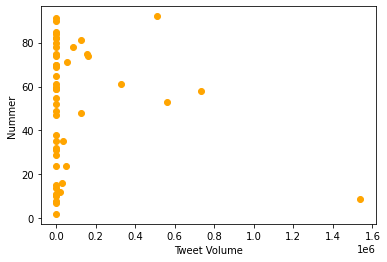

In [167]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(df['tweet_volume'],df['nummer'], color='orange')
plt.xlabel('Tweet Volume')
plt.ylabel('Nummer')

Nun wird der K-Means Algorithmus auf dem Datensatz angewendet. Zu Beginn wurden zwei Cluster gewählt. Der Algorithmus
teilt nun die Daten auf die zwei Cluster 0 und 1 auf. Die Aufteilung ist auf der Tabelle ersichtlich.

In [205]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['tweet_volume', 'nummer']])

df['cluster'] = y_predicted
df.head()

,name,tweet_volume,nummer,cluster
0,Donald,1539124,9,1
1,J'avais,35188,35,0
2,WhatsApp,561474,53,1
3,Spotify,733882,58,1
4,#Adelboden,1,70,0


Anhang der Daten und der Aufteilung durch den K-Means Algorithmus, werden die Daten ausgegeben. Die orangen Punkte
beziehen sich auf die Daten des ersten Clusters, die grünen Punkte auf die Daten des zweiten Clusters.

No handles with labels found to put in legend.


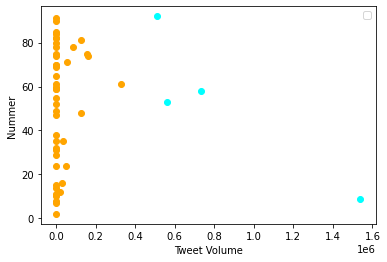

In [206]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1.tweet_volume, df1['nummer'], color='orange')
plt.scatter(df2.tweet_volume, df2['nummer'], color='cyan')

plt.xlabel('Tweet Volume')
plt.ylabel('Nummer')
plt.legend()

## Centroiden

Nun werden die Centroiden (Mittelpunkte) der zwei Cluster berechnet und im Diagramm eingefügt. Das Array enthält die zwei
Koordinaten der Centroiden.

In [207]:
km.cluster_centers_

array([[2.56971522e+04, 5.14782609e+01],
       [8.35747000e+05, 5.30000000e+01]])

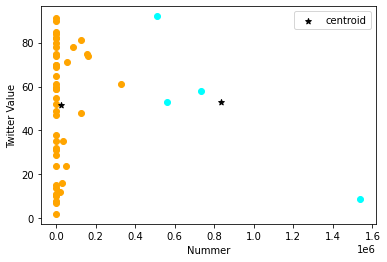

In [208]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1.tweet_volume, df1['nummer'], color='orange')
plt.scatter(df2.tweet_volume, df2['nummer'], color='cyan')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            color='Black',
            marker='*',
            label='centroid')

plt.xlabel('Nummer')
plt.ylabel('Twitter Value')
plt.legend()

Im nächsten Schritt werden nun die Punkte zu den Centroiden optimiert.

In [209]:
import numpy as np

def plot_clusters(data_arg,li_cluster_indices,colors,centroids):
    data_clusters=[]
    for j in range(0,len(li_cluster_indices)):
        data_clusters.append([])
    data_centroid=[]

    for i in range(0,len(data_arg)):
        for j in range(0,len(li_cluster_indices)):
            cluster_indices=li_cluster_indices[j]
            if i in cluster_indices:
                data_clusters[j].append(data_arg[i])

    for cluster, color in zip(data_clusters,colors):
        x,y=np.array(cluster).T
        plt.scatter(x,y,color=color)
    x,y=np.array(centroids).T
    plt.scatter(x,y,color="black", marker='*', label='centroid')
    plt.show()

def euclidean_distance2(pt1, pt2):
    return np.linalg.norm(pt1 - pt2)

In [210]:
data= [[1539124,9],[35188,35],[561474,53],[733882,58],[1,70],[1,2],[1,82],[1,80],[1,55],[1,78],[1,75],[1,38],[1,84],
       [1,52],[1,65],[508508,92],[1,15],[1,59],[1,10],[1,61],[1,24],[1,74],[1,32],[1,59],[1,14],[1,47],[1,69],[161980,74],
       [124661,81],[1,60],[1,8],[1,70],[1,11],[1,31],[87242,78],[1,29],[330809,61],[1,91],[1,82],[1,7],[1,35],[19274,12],
       [1,90],[157385,75],[127209,48],[30203,16],[1,85],[50709,24],[57374,71],[1,49]
       ]

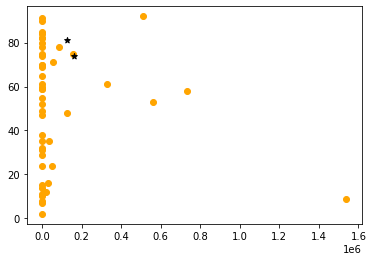

adjust clusters
adjust centroids
adjust clusters
adjust centroids
adjust clusters
adjust centroids
adjust clusters
adjust centroids
convergence!


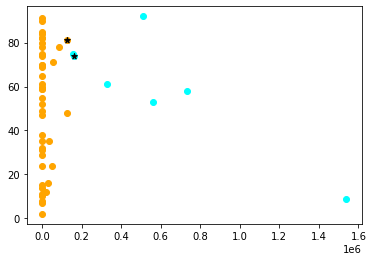

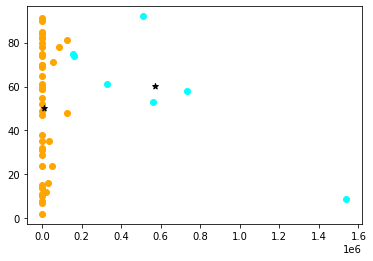

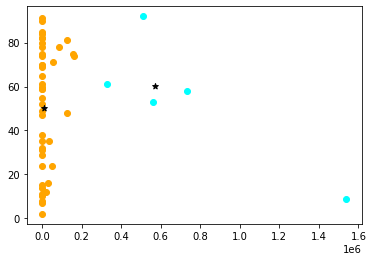

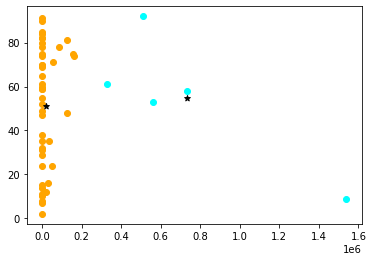

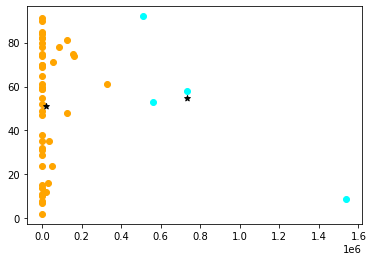

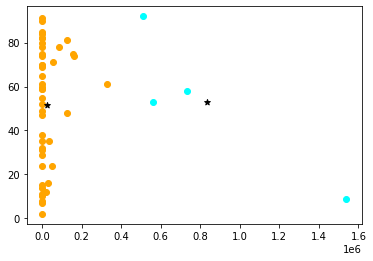

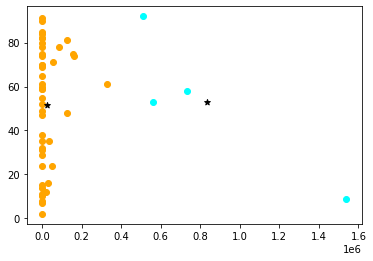

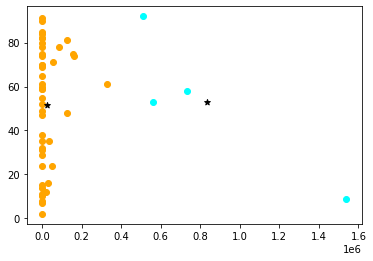

In [201]:
random.shuffle(data)
c1=np.array(data[0])
c2=np.array(data[1])
rest=[]
for i in range(2,len(data)):
    rest.append(i)
plot_clusters(data,[rest],["orange"],[c1,c2])

cluster1=[]
cluster2=[]
centroid_index1=0
centroid_index2=1
oldc1=c1
oldc2=c2
for k in range(0,10):
        l=0
        cluster1=[]
        cluster2=[]
        for point in data:
            distance_c1=euclidean_distance2(np.array(point),c1)
            distance_c2=euclidean_distance2(np.array(point),c2)
            if distance_c1<distance_c2:
                cluster1.append(l)
            else:
                cluster2.append(l)
            l=l+1
        print ("adjust clusters")
        plot_clusters(data,[cluster1,cluster2],["orange","cyan"],[c1,c2,])

        c1=np.array([0.0])
        for i in cluster1:
            c1=c1+np.array(data[i])
        c1=c1/len(cluster1)

        c2=np.array([0.0])
        for i in cluster2:
            c2=c2+np.array(data[i])
        c2=c2/len(cluster2)

        print ("adjust centroids")
        plot_clusters(data,[cluster1,cluster2],["orange","cyan"],[c1,c2])

        if np.linalg.norm(c1-oldc1)+np.linalg.norm(c2-oldc2)<0.00001:
            print ("convergence!")
            break
        oldc1=c1
        oldc2=c2

## Ellbow Methode

Wir erkennen auf dem Diagramm, das die zwei Cluster nicht optimal gewählt wurden. Der Punkt unten rechts passt nicht
recht zu den zwei Centroiden. Dies kann rechnerisch überprüft werden. Dafür wird die Ellbow-Methode angewandt.
Aus der Berechnung ist ersichtlich das drei Cluster gewählt werden sollen. Dies untermauert die Vermutung.

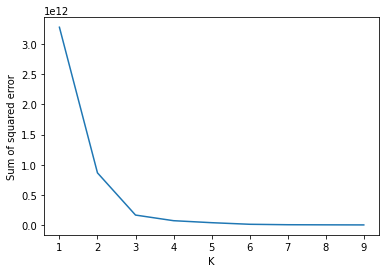

In [211]:
# ellbow plot method
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['tweet_volume', 'nummer']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

Die Ellbow-Methode hat ergeben das sich drei Cluster besser eignen als zwei, daher wiederholen wir den K-Means Algorithmus
für drei Cluster und geben das Resultat aus.

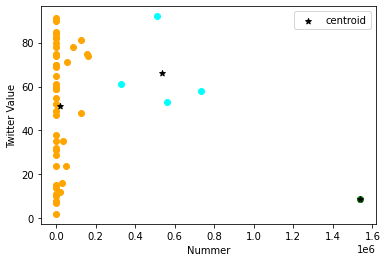

In [219]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.tweet_volume, df1['nummer'], color='orange')
plt.scatter(df2.tweet_volume, df2['nummer'], color='green')
plt.scatter(df3.tweet_volume, df3['nummer'], color='cyan')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            color='Black',
            marker='*',
            label='centroid')

plt.xlabel('Nummer')
plt.ylabel('Twitter Value')
plt.legend()

Das Diagramm zeigt nun eine sinnvolle Cluster aufteilung mit drei Centroiden.

## Findings

Der wichtigste Punkt der beachtet werden muss, sind meines erachtens, die Daten. Sie müssen in geeigneter Form und in
passendem Format vorhanden sein. Ansonsten müssen diese zuerst angepasst werden was aufwendig sein kann.
Zum Beispiel sind bei den weltweite trendigen Topics auch Zeichen ausserhalb des UTF-8 Zeichensatzes enthalten.
Ist der Datensatz vollständig und in passendem Format vorhanden, kann mit der Berechnung begonnen werden.
Die Berechnung empfang ich als weniger aufwendiger Punkt.

---
## Quellenverzeichnis

### Literaturverzeichnis

[1] Russell, Matthew A. / Mikhail Klassen (2019): Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Instagram,
GitHub, and More, 3. Aufl., Sebastopol, USA, California: O’Reilly Media.
